In [2]:
from sqlalchemy.engine import create_engine

In [3]:
engine = create_engine('bigquery://', credentials_path= 'key/iowa-liquor-sales-365322-12ff7a5498e6.json')

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [30]:
sql_statement = """
SELECT
    invoice_and_item_number,
    date,
    county,
    category_name,
    item_description,
    pack,
    bottle_volume_ml,
    bottles_sold
    
FROM `bigquery-public-data.iowa_liquor_sales.sales`
--WHERE date >='2021-01-01' AND date <= '2021-12-31'
WHERE date >='2021-01-01' AND date <= '2021-01-31'
--WHERE date = '2021-01-04'
""".strip()
print(sql_statement)

SELECT
    invoice_and_item_number,
    date,
    county,
    category_name,
    item_description,
    pack,
    bottle_volume_ml,
    bottles_sold
    
FROM `bigquery-public-data.iowa_liquor_sales.sales`
--WHERE date >='2021-01-01' AND date <= '2021-12-31'
WHERE date >='2021-01-01' AND date <= '2021-01-31'
--WHERE date = '2021-01-04'


In [31]:
df = pd.read_sql_query(sql_statement, engine)

In [32]:
df

,invoice_and_item_number,date,county,category_name,item_description,pack,bottle_volume_ml,bottles_sold
0,INV-33185100002,2021-01-04,FRANKLIN,SCOTCH WHISKIES,BUCHANAN DELUXE 12YR,12,750,24
1,INV-33723000039,2021-01-22,HUMBOLDT,CANADIAN WHISKIES,CROWN ROYAL REGAL APPLE,12,750,24
2,INV-33874900040,2021-01-29,POLK,CANADIAN WHISKIES,CROWN ROYAL REGAL APPLE,12,750,24
3,INV-33523800085,2021-01-18,POLK,CANADIAN WHISKIES,CROWN ROYAL,12,750,24
4,INV-33441700060,2021-01-13,JOHNSON,IRISH WHISKIES,FINAGRENS IRISH WHISKEY,12,750,24
...,...,...,...,...,...,...,...,...
196462,INV-33752300043,2021-01-25,CEDAR,TEMPORARY & SPECIALTY PACKAGES,KETEL ONE W/ 2 BLOODY MARY GLASSES VAP,6,750,2
196463,INV-33838700002,2021-01-27,MAHASKA,TEMPORARY & SPECIALTY PACKAGES,HENNESSY V.S.O.P NBA 2020 GIFTBOX,12,750,2
196464,INV-33645800087,2021-01-20,JOHNSON,SPECIAL ORDER ITEMS,SOOH CHARTREUSE GREEN FRENCH LIQUEUR,12,750,2
196465,INV-33413500015,2021-01-13,LINN,AMERICAN VODKA,SOOH WHEATLEY VODKA,12,750,2


In [33]:
df['category_name']

0                         SCOTCH WHISKIES
1                       CANADIAN WHISKIES
2                       CANADIAN WHISKIES
3                       CANADIAN WHISKIES
4                          IRISH WHISKIES
                       ...               
196462    TEMPORARY &  SPECIALTY PACKAGES
196463     TEMPORARY & SPECIALTY PACKAGES
196464                SPECIAL ORDER ITEMS
196465                     AMERICAN VODKA
196466       AMERICAN CORDIALS & LIQUEURS
Name: category_name, Length: 196467, dtype: object

In [103]:
df.isna().sum()

county                0
total_bottles_sold    0
dtype: int64

In [41]:
df.duplicated().sum()

0

Text(0, 0.5, 'Number of Times Ordered')

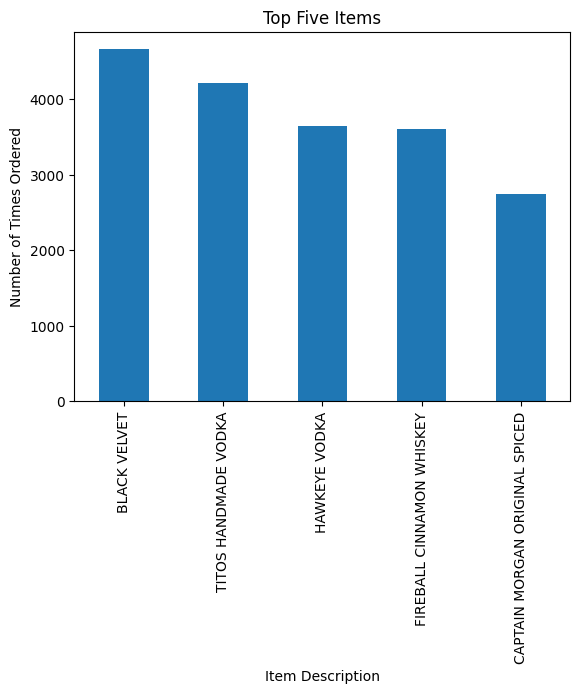

In [49]:
ax = df[f'item_description'].value_counts().head().plot(kind='bar', title = 'Top Five Items')
ax.set_xlabel('Item Description')
ax.set_ylabel('Number of Times Ordered')

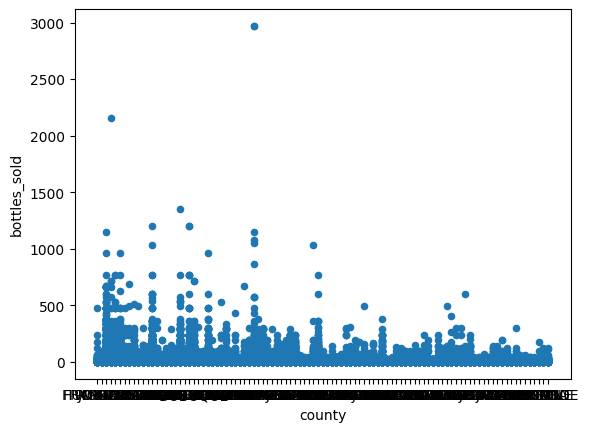

In [55]:
df.plot(kind = 'scatter', x = 'county', y = 'bottles_sold')
plt.show()

<AxesSubplot: xlabel='county', ylabel='bottles_sold'>

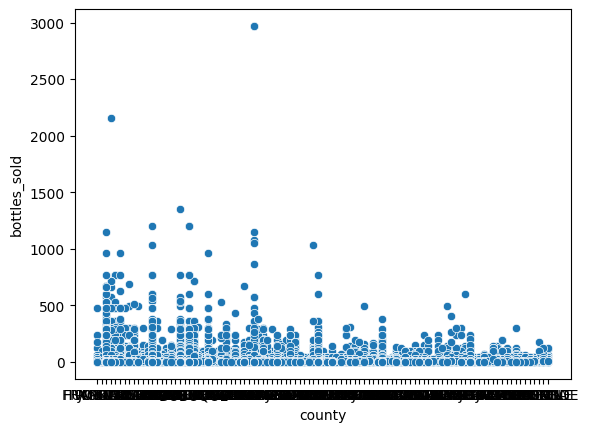

In [56]:
sns.scatterplot(x = 'county', y = 'bottles_sold', data=df)

In [107]:
sql_statement2 = """
SELECT * 
FROM
  (SELECT
      county,
      count(bottles_sold) as total_bottles_sold
  FROM `bigquery-public-data.iowa_liquor_sales.sales`
  --WHERE date >='2021-01-01' AND date <= '2021-12-31'
  WHERE date >='2021-01-01' AND date <= '2021-01-31' 
  --WHERE date = '2021-01-04'
  GROUP BY county)
WHERE total_bottles_sold > 2000
ORDER BY total_bottles_sold DESC


""".strip()
print(sql_statement2)

SELECT * 
FROM
  (SELECT
      county,
      count(bottles_sold) as total_bottles_sold
  FROM `bigquery-public-data.iowa_liquor_sales.sales`
  --WHERE date >='2021-01-01' AND date <= '2021-12-31'
  WHERE date >='2021-01-01' AND date <= '2021-01-31' 
  --WHERE date = '2021-01-04'
  GROUP BY county)
WHERE total_bottles_sold > 2000
ORDER BY total_bottles_sold DESC


In [108]:
df = pd.read_sql_query(sql_statement2, engine)

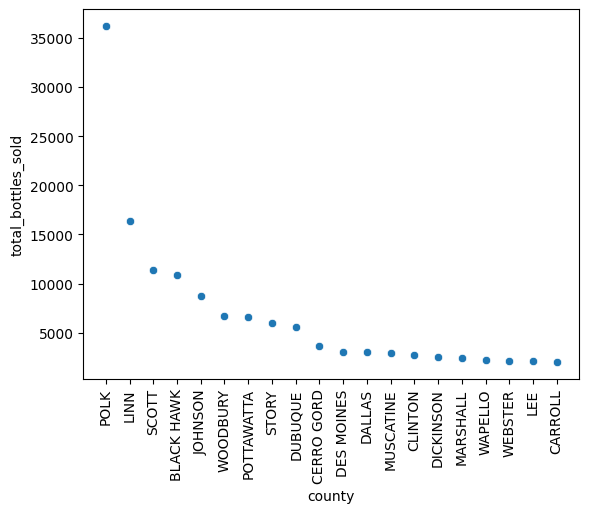

In [109]:
sns.scatterplot(x = 'county', y = 'total_bottles_sold', data=df)
plt.xticks(rotation=90)
plt.show()